<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Import Library
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Baca Dataset CSV
</div>

In [2]:
df = pd.read_csv("penjualan.csv")

df.head()

,nama,jan,feb,mar,apr
0,Andi,100,135,85,75
1,Budi,200,240,185,160
2,Chandra,300,315,285,190
3,Dudi,250,270,230,200
4,Eko,150,195,110,100


<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi Sederhana Penjualan
</div>

alpha = -56.03855245024894
beta = 0.8648191600282885


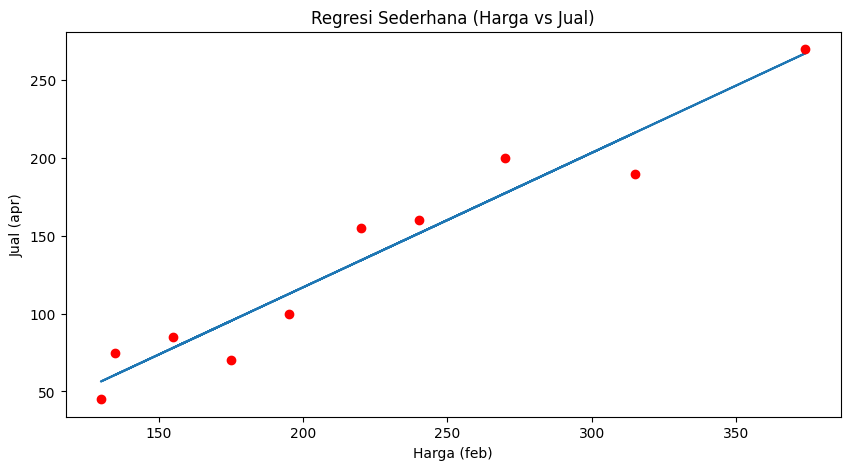

In [3]:
#Variabel
x = df["feb"]
y = df["apr"]

#Hitung mean x dan y
xmean = np.mean(x)
ymean = np.mean(y)

#Hitung covariance dan variance
df["xycov"] = (df["feb"] - xmean) * (df["apr"] - ymean)
df["xvar"] = (df["feb"] - xmean)**2

#Hitung beta and alpha
beta = df["xycov"].sum() / df["xvar"].sum()
alpha = ymean - (beta*xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

#Fungsi prediksi
ypred = alpha + beta * x     

#Plot regresi untuk data aktual
plt.figure(figsize=(10, 5))
plt.plot(x, ypred, label="Prediksi")
plt.plot(x, y, "ro", label="Aktual")
plt.title("Regresi Sederhana (Harga vs Jual)")
plt.xlabel("Harga (feb)")
plt.ylabel("Jual (apr)")

plt.show()

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi Berganda dan Plot 3D
</div>

In [4]:
#Memilih Var 
x1 = df["feb"]
x2 = df["mar"]
y = df["apr"]


#Membuat dataframe
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y
})

#Analisis regresi berganda
x =sm.add_constant(df[["x1", "x2"]])
model = sm.OLS(df["y"], x).fit()

#Mendapatkan koefisien regresi
koefisien = model.params

#Scatter plot 3D
scatter_plot = go.Scatter3d(
    x=df["x1"],
    y=df["x2"],
    z=df["y"], 
    mode="markers",
    marker=dict(
        size=5,
        color="blue",
        opacity=0.8
    ),
    name="Data"
)

#Membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(np.linspace(1, 50, 10), np.linspace(3, 60, 10))
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

#Permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Purples",
    opacity=0.5,
    name="Garis Regresi"
)

#Membuat layout plot
layout = go.Layout(
    title="Scatter Plot 3D",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="y"
    ),
    showlegend=True 
)

#Membuat figure dengan scatter plot dan permukaan regresi
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

#Menampilkan plot
fig.show()